# Recreating a creative data visualization by Alli Torban in Python and Matplotlib

In this notebook, I'm going to recreate a visualization by Alli Torban ([link](https://www.linkedin.com/feed/update/urn:li:activity:7181007667983720448/)).

We'll do so in three steps:

1. Load the data
2. Test visualizations
3. Final visualization

First, we'll load the required packages:

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib notebook

## 1. Load the data

We then set the data based on information from [the provided source](https://rarediseases.org/rare-diseases/progressive-supranuclear-palsy/).

In [2]:
onset_range = [45, 75]
avg_value = 63
labels = [0,25,50,75,100]

## 2. Test visualization
we can use this to create a basic horizontal stacked bar chart:

<IPython.core.display.Javascript object>


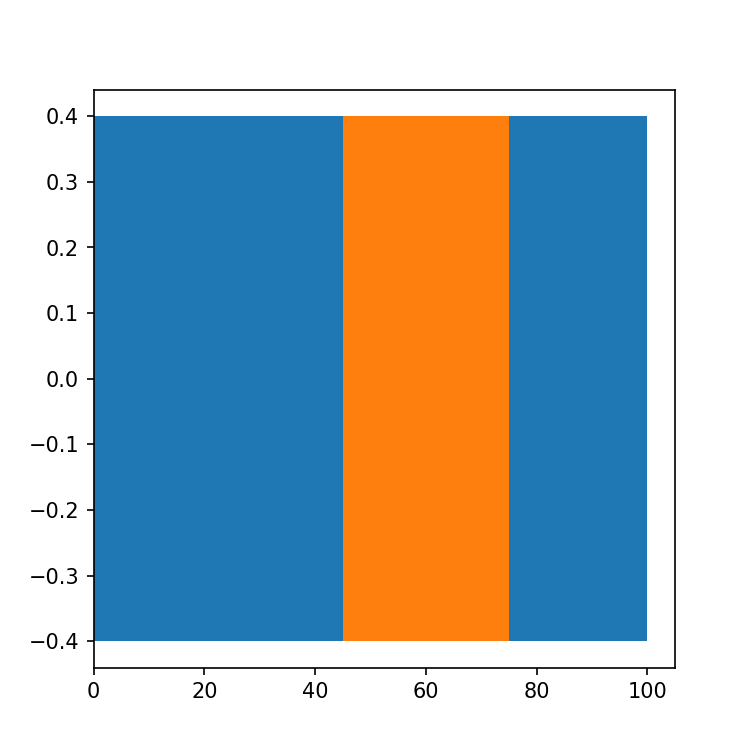

<BarContainer object of 1 artists>

In [3]:
fig, ax = plt.subplots(
    figsize=(5,5),
)

ax.barh(
    y=0,
    width=[100],
)

ax.barh(
    y=0,
    width=onset_range[1]-onset_range[0],
    left=onset_range[0]
)

I'll modify this to add some data labels and markers with those labels (using `ax.scatter`):

<IPython.core.display.Javascript object>


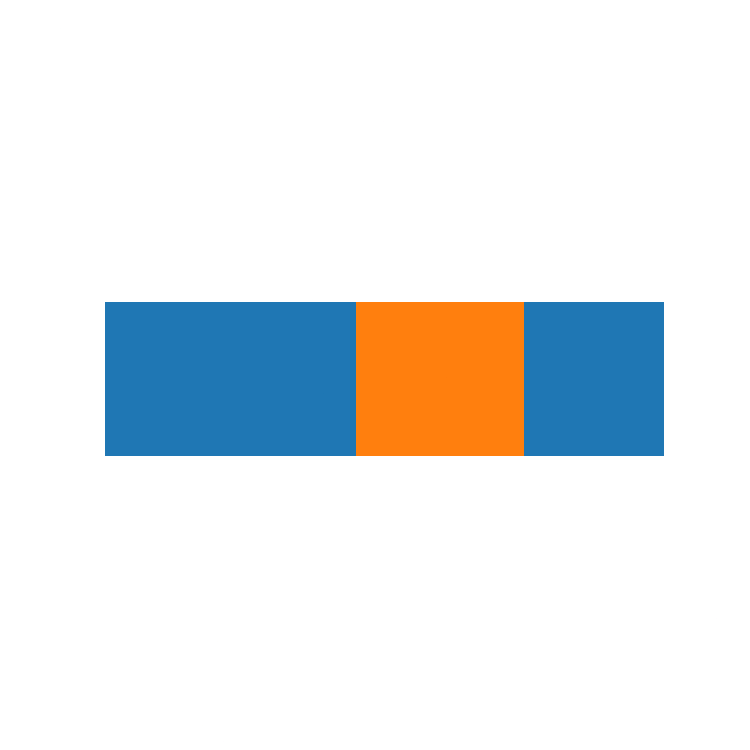

(-2.0, 102.0, -1.5, 1.5)

In [4]:
fig, ax = plt.subplots(
    figsize=(5,5),
)

ax.barh(
    y=0,
    width=[100],
)

ax.barh(
    y=0,
    width=onset_range[1]-onset_range[0],
    left=onset_range[0]
)

# modify axis limits for white space
ax.set_ylim(-1.5,1.5)
ax.set_xlim(-2,102)

# add data labels and markers
for label in labels:
    ax.text(
        x=label,
        y=-.5,
        s=str(label),
        va='top',
        ha='center'
    )
    

    ax.scatter(
        label,
        -.4,
        color='black'
    ) 

# add avg label and marker
ax.text(
    avg_value,
    -.2,
    s=str(avg_value),
    ha='center'
)
    
ax.scatter(
    avg_value,
    0,
    color='black',
    s=200,
)

# hide the axis
ax.axis('off')

As a final step for the test viz, I'll add custom markers. I never used custom marker before, but a nice user on Stack Overflow helped me out: https://stackoverflow.com/questions/49791084/matplotlib-custom-marker-path.

<IPython.core.display.Javascript object>


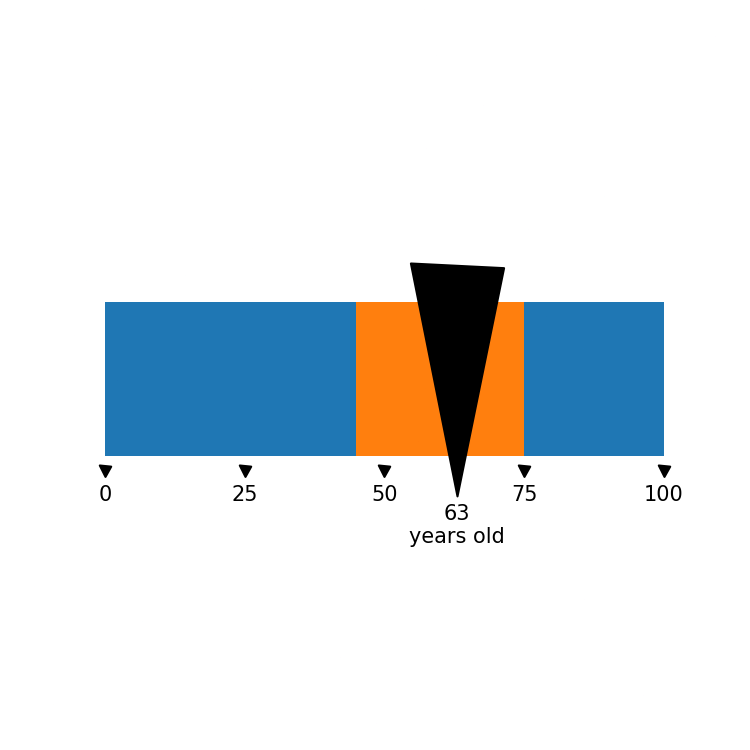

(-2.0, 102.0, -1.5, 1.5)

In [24]:
fig, ax = plt.subplots(
    figsize=(5,5),
)

ax.barh(
    y=0,
    width=[100],
)

ax.barh(
    y=0,
    width=onset_range[1]-onset_range[0],
    left=onset_range[0]
)

ax.set_ylim(-1.5,1.5)
ax.set_xlim(-2,102)

# define custom markers
custommarker = mpl.path.Path(
    [(-1,0),(1,-.2),(0,-2),(-1,0)],
    [1,2,2,79]

)
custommarker_long = mpl.path.Path(
    [(-1,0),(1,-.1),(0,-5),(-1, 0)],
    [1,2,2,79]
)


for label in labels:
    ax.text(
        x=label,
        y=-.55,
        s=str(label),
        va='top',
        ha='center'
    )
    
    # use custom marker
    ax.scatter(
        label,
        -.45,
        color='black',
        marker=custommarker,
        s=120,
    ) 
    
ax.text(
    avg_value,
    -.65,
    s=f'{str(avg_value)}\nyears old',
    va='top',
    ha='center'
)
    
# use custom marker
ax.scatter(
    avg_value,
    .6,
    color='black',
    marker=custommarker_long,
    s=50000,
)
    
ax.axis('off')

Alright, now lets add the line marker for the onset area:

<IPython.core.display.Javascript object>


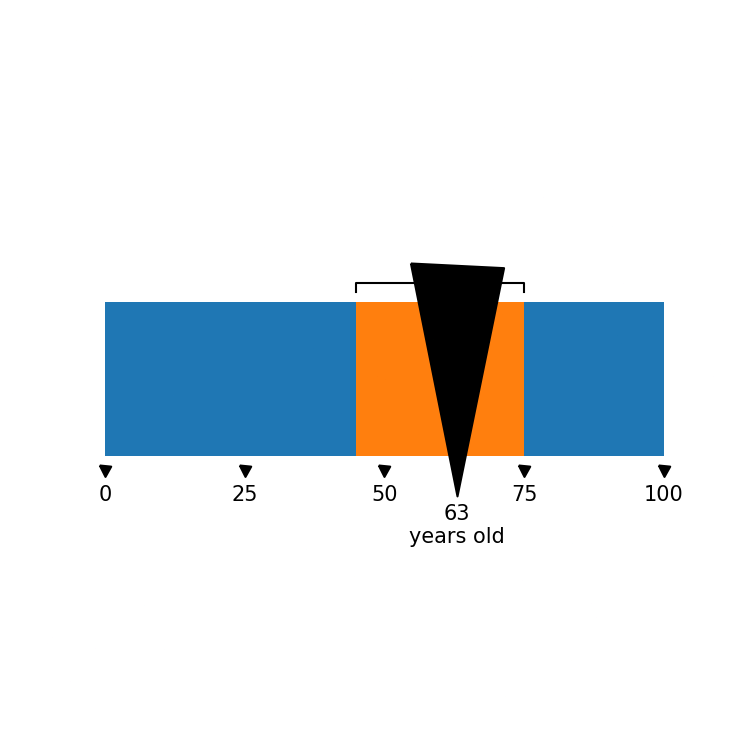

75

In [25]:
fig, ax = plt.subplots(
    figsize=(5,5),
)

ax.barh(
    y=0,
    width=[100],
)

ax.barh(
    y=0,
    width=onset_range[1]-onset_range[0],
    left=onset_range[0]
)

ax.set_ylim(-1.5,1.5)
ax.set_xlim(-2,102)


custommarker = mpl.path.Path(
    [(-1,0),(1,-.2),(0,-2),(-1,0)],
    [1,2,2,79]

)
custommarker_long = mpl.path.Path(
    [(-1,0),(1,-.1),(0,-5),(-1, 0)],
    [1,2,2,79]
)


for label in labels:
    ax.text(
        x=label,
        y=-.55,
        s=str(label),
        va='top',
        ha='center'
    )
    

    ax.scatter(
        label,
        -.45,
        color='black',
        marker=custommarker.vertices,
        s=120,
    ) 
    
ax.text(
    avg_value,
    -.65,
    s=f'{str(avg_value)}\nyears old',
    va='top',
    ha='center'
)
    
ax.scatter(
    avg_value,
    .6,
    color='black',
    marker=custommarker_long.vertices,
    s=50000,
)

# add plot line as marker for onset range
ax.plot(
    [onset_range[0], onset_range[0], onset_range[1], onset_range[1]],
    [.45, .5, .5, .45],
    zorder=0,
    color='black',
    lw=1
)
    
ax.axis('off')

onset_range[1]

Alright, now we add the original colours. I'll define them at the start and use them later on. I also change the `edgecolor`  and `lw` of the big marker:

<IPython.core.display.Javascript object>


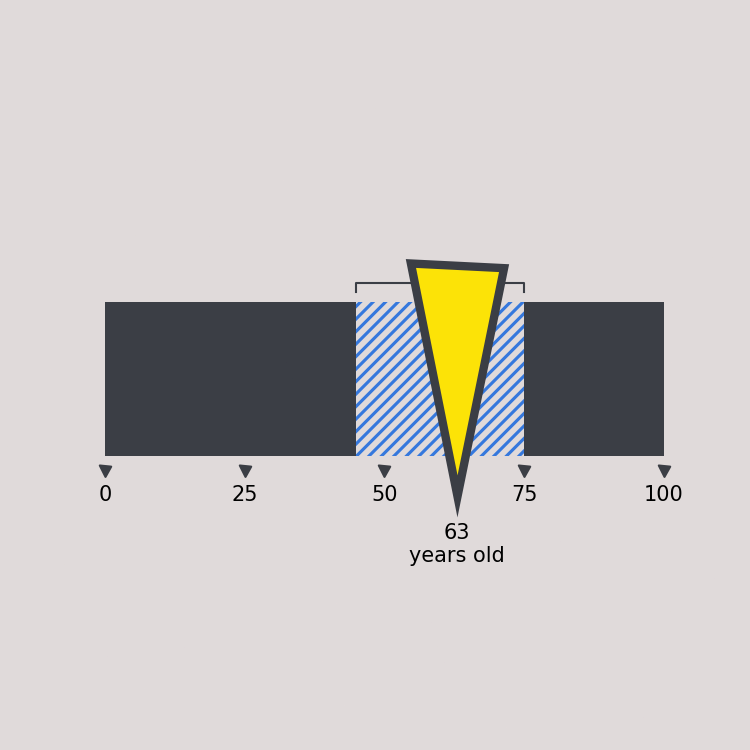

(-2.0, 102.0, -1.5, 1.5)

In [26]:
# define colours
bg_color = '#E0DADA'
data_dark_color = '#3B3E45'
data_highlight_color = '#3578dd'
marker_highlight_color = '#fce307'

fig, ax = plt.subplots(
    figsize=(5,5),
    facecolor=bg_color,
)

# and apply to all data plots
ax.barh(
    y=0,
    width=[100],
    color=data_dark_color
)


plt.rcParams['hatch.color'] = data_highlight_color
plt.rcParams['hatch.linewidth'] = 1.5
 
ax.barh(
    y=0,
    width=onset_range[1]-onset_range[0],
    left=onset_range[0],
    hatch='////',
    color=bg_color,
#     data_highlight_color
)

ax.set_ylim(-1.5,1.5)
ax.set_xlim(-2,102)


custommarker = mpl.path.Path(
    [(-1,0),(1,-.2),(0,-2),(-1,0)],
    [1,2,2,79]

)
custommarker_long = mpl.path.Path(
    [(-1,0),(1,-.1),(0,-5),(-1, 0)],
    [1,2,2,79]
)


for label in labels:
    ax.text(
        x=label,
        y=-.55,
        s=str(label),
        va='top',
        ha='center'
    )
    

    ax.scatter(
        label,
        -.45,
        color=data_dark_color,
        marker=custommarker,
        s=120,
    ) 
    
ax.text(
    avg_value,
    -.75,
    s=f'{str(avg_value)}\nyears old',
    va='top',
    ha='center'
)
    
ax.scatter(
    avg_value,
    .6,
    color=marker_highlight_color,
    marker=custommarker_long,
    s=50000,
    edgecolor=data_dark_color,
    joinstyle='miter',
    lw=4,
)

ax.plot(
    [onset_range[0], onset_range[0], onset_range[1], onset_range[1]],
    [.45, .5, .5, .45],
    zorder=0,
    color=data_dark_color,
    lw=1
)
    
ax.axis('off')

As a final step, I load a custom font (`Roboto`), add it to the existing text labels, and add the missing ones (title, credits, and sources). 

<IPython.core.display.Javascript object>


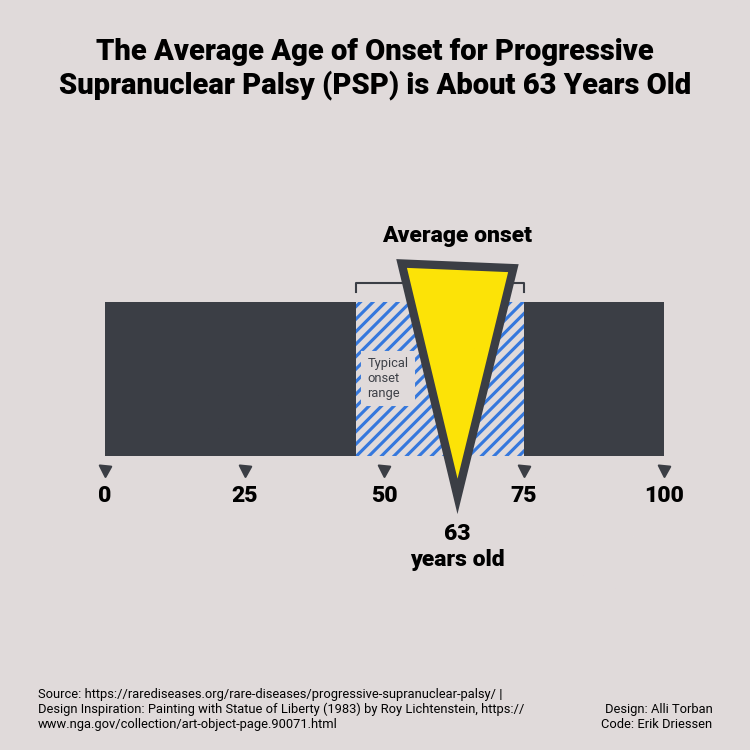

Text(0.05, 0.025, 'Source: https://rarediseases.org/rare-diseases/progressive-supranuclear-palsy/ |\nDesign Inspiration: Painting with Statue of Liberty (1983) by Roy Lichtenstein, https://\nwww.nga.gov/collection/art-object-page.90071.html')

In [27]:
bg_color = '#E0DADA'
data_dark_color = '#3B3E45'
data_highlight_color = '#3578dd'
marker_highlight_color = '#fce307'

# load fonts here
rob_font_bold = {'fontname':'Roboto', 'fontweight': 'heavy', 'fontsize': 11}
rob_font_bold_big = rob_font_bold.copy()
rob_font_bold_big['fontsize'] = 14
rob_font_normal = {'fontname':'Roboto', 'fontweight': 'normal', 'fontsize': 6.2}

fig, ax = plt.subplots(
    figsize=(5,5),
    facecolor=bg_color,
)

ax.barh(
    y=0,
    width=[100],
    color=data_dark_color
)


plt.rcParams['hatch.color'] = data_highlight_color
plt.rcParams['hatch.linewidth'] = 1.5
 
ax.barh(
    y=0,
    width=onset_range[1]-onset_range[0],
    left=onset_range[0],
    hatch='////',
    color=bg_color,
#     data_highlight_color
)

ax.set_ylim(-1.5,1.5)
ax.set_xlim(-2,102)


custommarker = mpl.path.Path(
    [(-1,0),(1,-.2),(0,-2),(-1,0)],
    [1,2,2,79]

)
custommarker_long = mpl.path.Path(
    [(-1.2,0),(1.2,-.1),(0,-5),(-1, 0)],
    [1,2,2,79]
)

# and apply at all ax.text calls
for label in labels:
    ax.text(
        x=label,
        y=-.55,
        s=str(label),
        va='top',
        ha='center',
        **rob_font_bold,
    )
    

    ax.scatter(
        label,
        -.45,
        color=data_dark_color,
        marker=custommarker,
        s=120,
    ) 
    


ax.text(
    avg_value,
    .8,
    s=f'Average onset',
    va='top',
    ha='center',
    **rob_font_bold,
)

ax.text(
    avg_value,
    -.75,
    s=f'{str(avg_value)}\nyears old',
    va='top',
    ha='center',
    **rob_font_bold,
)
    
ax.scatter(
    avg_value,
    .6,
    color=marker_highlight_color,
    marker=custommarker_long,
    s=50000,
    edgecolor=data_dark_color,
    joinstyle='miter',
    lw=4,
)

ax.plot(
    [onset_range[0], onset_range[0], onset_range[1], onset_range[1]],
    [.45, .5, .5, .45],
    zorder=0,
    color=data_dark_color,
    lw=1
)
    
ax.axis('off')

plt.text(
    x=.5,
    y=.95,
    ha='center',
    va='top',
    s=f'The Average Age of Onset for Progressive\nSupranuclear Palsy (PSP) is About {str(avg_value)} Years Old',
    transform=fig.transFigure,
    **rob_font_bold_big
)

plt.text(    
    x=.95,
    y=.025,
    ha='right',
    va='bottom',
    s='Design: Alli Torban\nCode: Erik Driessen',
    transform=fig.transFigure,
    **rob_font_normal
)

plt.text(
    x=onset_range[0]+2,
    y=0,
    s='Typical\nonset\nrange',
    ha='left',
    va='center',
    color=data_dark_color,
    backgroundcolor=bg_color,
    **rob_font_normal
)

plt.text(    
    x=.05,
    y=.025,
    ha='left',
    va='bottom',
    s='''Source: https://rarediseases.org/rare-diseases/progressive-supranuclear-palsy/ |
Design Inspiration: Painting with Statue of Liberty (1983) by Roy Lichtenstein, https://
www.nga.gov/collection/art-object-page.90071.html''',
    transform=fig.transFigure,
    **rob_font_normal
)

And that's it. Pretty nice if you ask me :)

For the final test, we change the data to new (fictional) data and rerun the viz code to see if it truly is a data driven visualization:

In [28]:
onset_range = [15, 47]
avg_value = 33
labels = [0,25,50,75,100]

And now we run the viz code again:

<IPython.core.display.Javascript object>


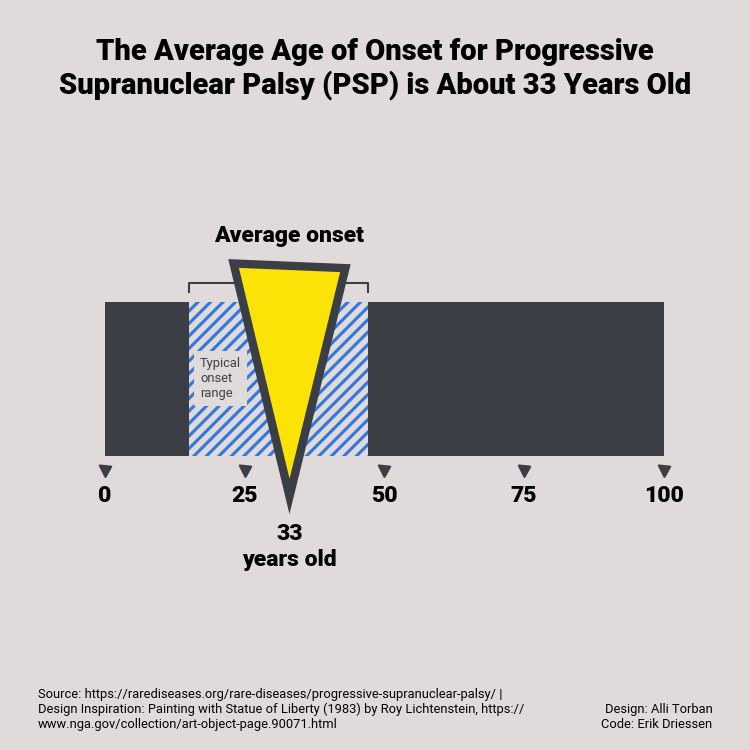

Text(0.05, 0.025, 'Source: https://rarediseases.org/rare-diseases/progressive-supranuclear-palsy/ |\nDesign Inspiration: Painting with Statue of Liberty (1983) by Roy Lichtenstein, https://\nwww.nga.gov/collection/art-object-page.90071.html')

In [29]:
bg_color = '#E0DADA'
data_dark_color = '#3B3E45'
data_highlight_color = '#3578dd'
marker_highlight_color = '#fce307'

# load fonts here
rob_font_bold = {'fontname':'Roboto', 'fontweight': 'heavy', 'fontsize': 11}
rob_font_bold_big = rob_font_bold.copy()
rob_font_bold_big['fontsize'] = 14
rob_font_normal = {'fontname':'Roboto', 'fontweight': 'normal', 'fontsize': 6.2}

fig, ax = plt.subplots(
    figsize=(5,5),
    facecolor=bg_color,
)

ax.barh(
    y=0,
    width=[100],
    color=data_dark_color
)


plt.rcParams['hatch.color'] = data_highlight_color
plt.rcParams['hatch.linewidth'] = 1.5
 
ax.barh(
    y=0,
    width=onset_range[1]-onset_range[0],
    left=onset_range[0],
    hatch='////',
    color=bg_color,
#     data_highlight_color
)

ax.set_ylim(-1.5,1.5)
ax.set_xlim(-2,102)


custommarker = mpl.path.Path(
    [(-1,0),(1,-.2),(0,-2),(-1,0)],
    [1,2,2,79]

)
custommarker_long = mpl.path.Path(
    [(-1.2,0),(1.2,-.1),(0,-5),(-1, 0)],
    [1,2,2,79]
)

# and apply at all ax.text calls
for label in labels:
    ax.text(
        x=label,
        y=-.55,
        s=str(label),
        va='top',
        ha='center',
        **rob_font_bold,
    )
    

    ax.scatter(
        label,
        -.45,
        color=data_dark_color,
        marker=custommarker,
        s=120,
    ) 
    


ax.text(
    avg_value,
    .8,
    s=f'Average onset',
    va='top',
    ha='center',
    **rob_font_bold,
)

ax.text(
    avg_value,
    -.75,
    s=f'{str(avg_value)}\nyears old',
    va='top',
    ha='center',
    **rob_font_bold,
)
    
ax.scatter(
    avg_value,
    .6,
    color=marker_highlight_color,
    marker=custommarker_long,
    s=50000,
    edgecolor=data_dark_color,
    joinstyle='miter',
    lw=4,
)

ax.plot(
    [onset_range[0], onset_range[0], onset_range[1], onset_range[1]],
    [.45, .5, .5, .45],
    zorder=0,
    color=data_dark_color,
    lw=1
)
    
ax.axis('off')

plt.text(
    x=.5,
    y=.95,
    ha='center',
    va='top',
    s=f'The Average Age of Onset for Progressive\nSupranuclear Palsy (PSP) is About {str(avg_value)} Years Old',
    transform=fig.transFigure,
    **rob_font_bold_big
)

plt.text(    
    x=.95,
    y=.025,
    ha='right',
    va='bottom',
    s='Design: Alli Torban\nCode: Erik Driessen',
    transform=fig.transFigure,
    **rob_font_normal
)

plt.text(
    x=onset_range[0]+2,
    y=0,
    s='Typical\nonset\nrange',
    ha='left',
    va='center',
    color=data_dark_color,
    backgroundcolor=bg_color,
    **rob_font_normal
)

plt.text(    
    x=.05,
    y=.025,
    ha='left',
    va='bottom',
    s='''Source: https://rarediseases.org/rare-diseases/progressive-supranuclear-palsy/ |
Design Inspiration: Painting with Statue of Liberty (1983) by Roy Lichtenstein, https://
www.nga.gov/collection/art-object-page.90071.html''',
    transform=fig.transFigure,
    **rob_font_normal
)

Alright, though the title is off now, the viz looks perfect!